# MRI Brain Tumor Classification using ViT Transformers

As technology advances, the use of MRI scans for diagnosing brain tumors has become increasingly common. Due to the advancements in both imaging technology and machine learning, we can now analyze MRI scans with greater accuracy and speed than ever before for diagnosing medical conditions. 

This notebook will focus on exploring a dataset of MRI scans that contain images of brain tumors. These images are split into four categories: glioma, meningioma, pituitary tumor, and no tumor. We will analyze data distributions, class imbalances, visualizing our data, then cleaning the data. 

## Dataset Overview

Key Features:
- **Image**: MRI scan of the brain
- **Label**: Class of tumor (glioma, meningioma, pituitary tumor, no tumor)
- **Size**: 7023 images (~5700 images for training, ~1300 images for testing)
- **Format**: JPEG
- **Dimensions**: 512x512 pixels
- **Source**: [Kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the dataset

In [2]:
def create_image_dataframe(root_dir):
    data = []
    for split in ['Testing', 'Training']:
        split_path = os.path.join(root_dir, split)
        for label in os.listdir(split_path):
            label_path = os.path.join(split_path, label)
            if os.path.isdir(label_path):
                for fname in os.listdir(label_path):
                    if fname.lower().endswith(('.jpg', '.jpeg')):
                        full_path = os.path.join(label_path, fname)
                        data.append({
                            'filepath': full_path,
                            'label': label,
                            'split': split
                        })
    return pd.DataFrame(data)

In [3]:
df = create_image_dataframe('../data')

In [4]:
train_df = df[df['split'] == 'Training'].copy()
train_df.drop(columns=['split'], inplace=True)
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,filepath,label
0,../data/Training/pituitary/Tr-pi_0505.jpg,pituitary
1,../data/Training/pituitary/Tr-pi_0263.jpg,pituitary
2,../data/Training/pituitary/Tr-pi_0277.jpg,pituitary
3,../data/Training/pituitary/Tr-pi_1169.jpg,pituitary
4,../data/Training/pituitary/Tr-pi_0511.jpg,pituitary


In [5]:
test_df = df[df['split'] == 'Testing'].copy()
test_df.drop(columns=['split'], inplace=True)
test_df.head()

,filepath,label
0,../data/Testing/pituitary/Te-pi_0233.jpg,pituitary
1,../data/Testing/pituitary/Te-pi_0227.jpg,pituitary
2,../data/Testing/pituitary/Te-pi_0019.jpg,pituitary
3,../data/Testing/pituitary/Te-pi_0031.jpg,pituitary
4,../data/Testing/pituitary/Te-pi_0025.jpg,pituitary


## Data Visualization

### Checking the distribution of classes

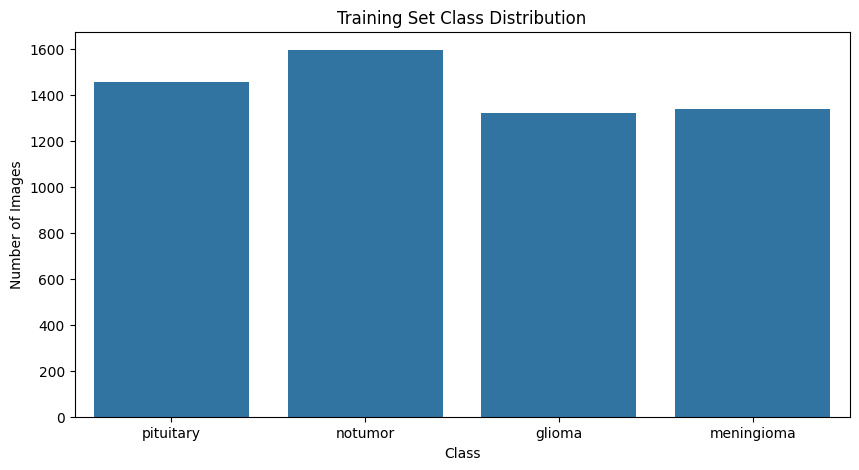

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='label')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

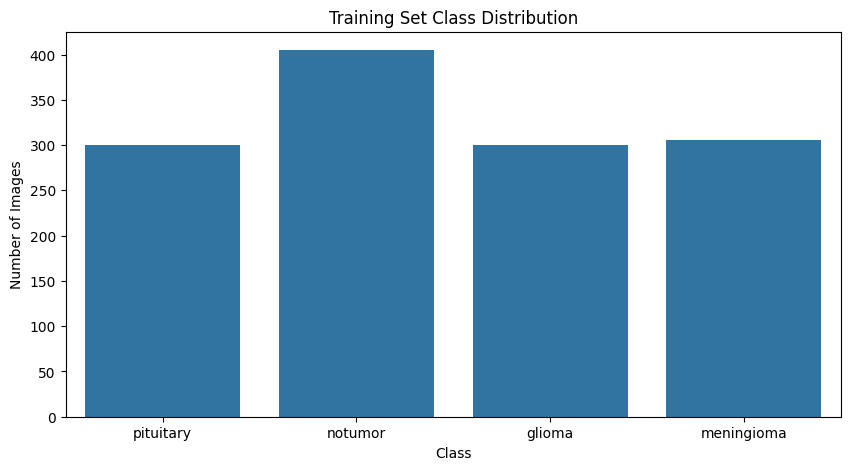

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=test_df, x='label')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## Sample images

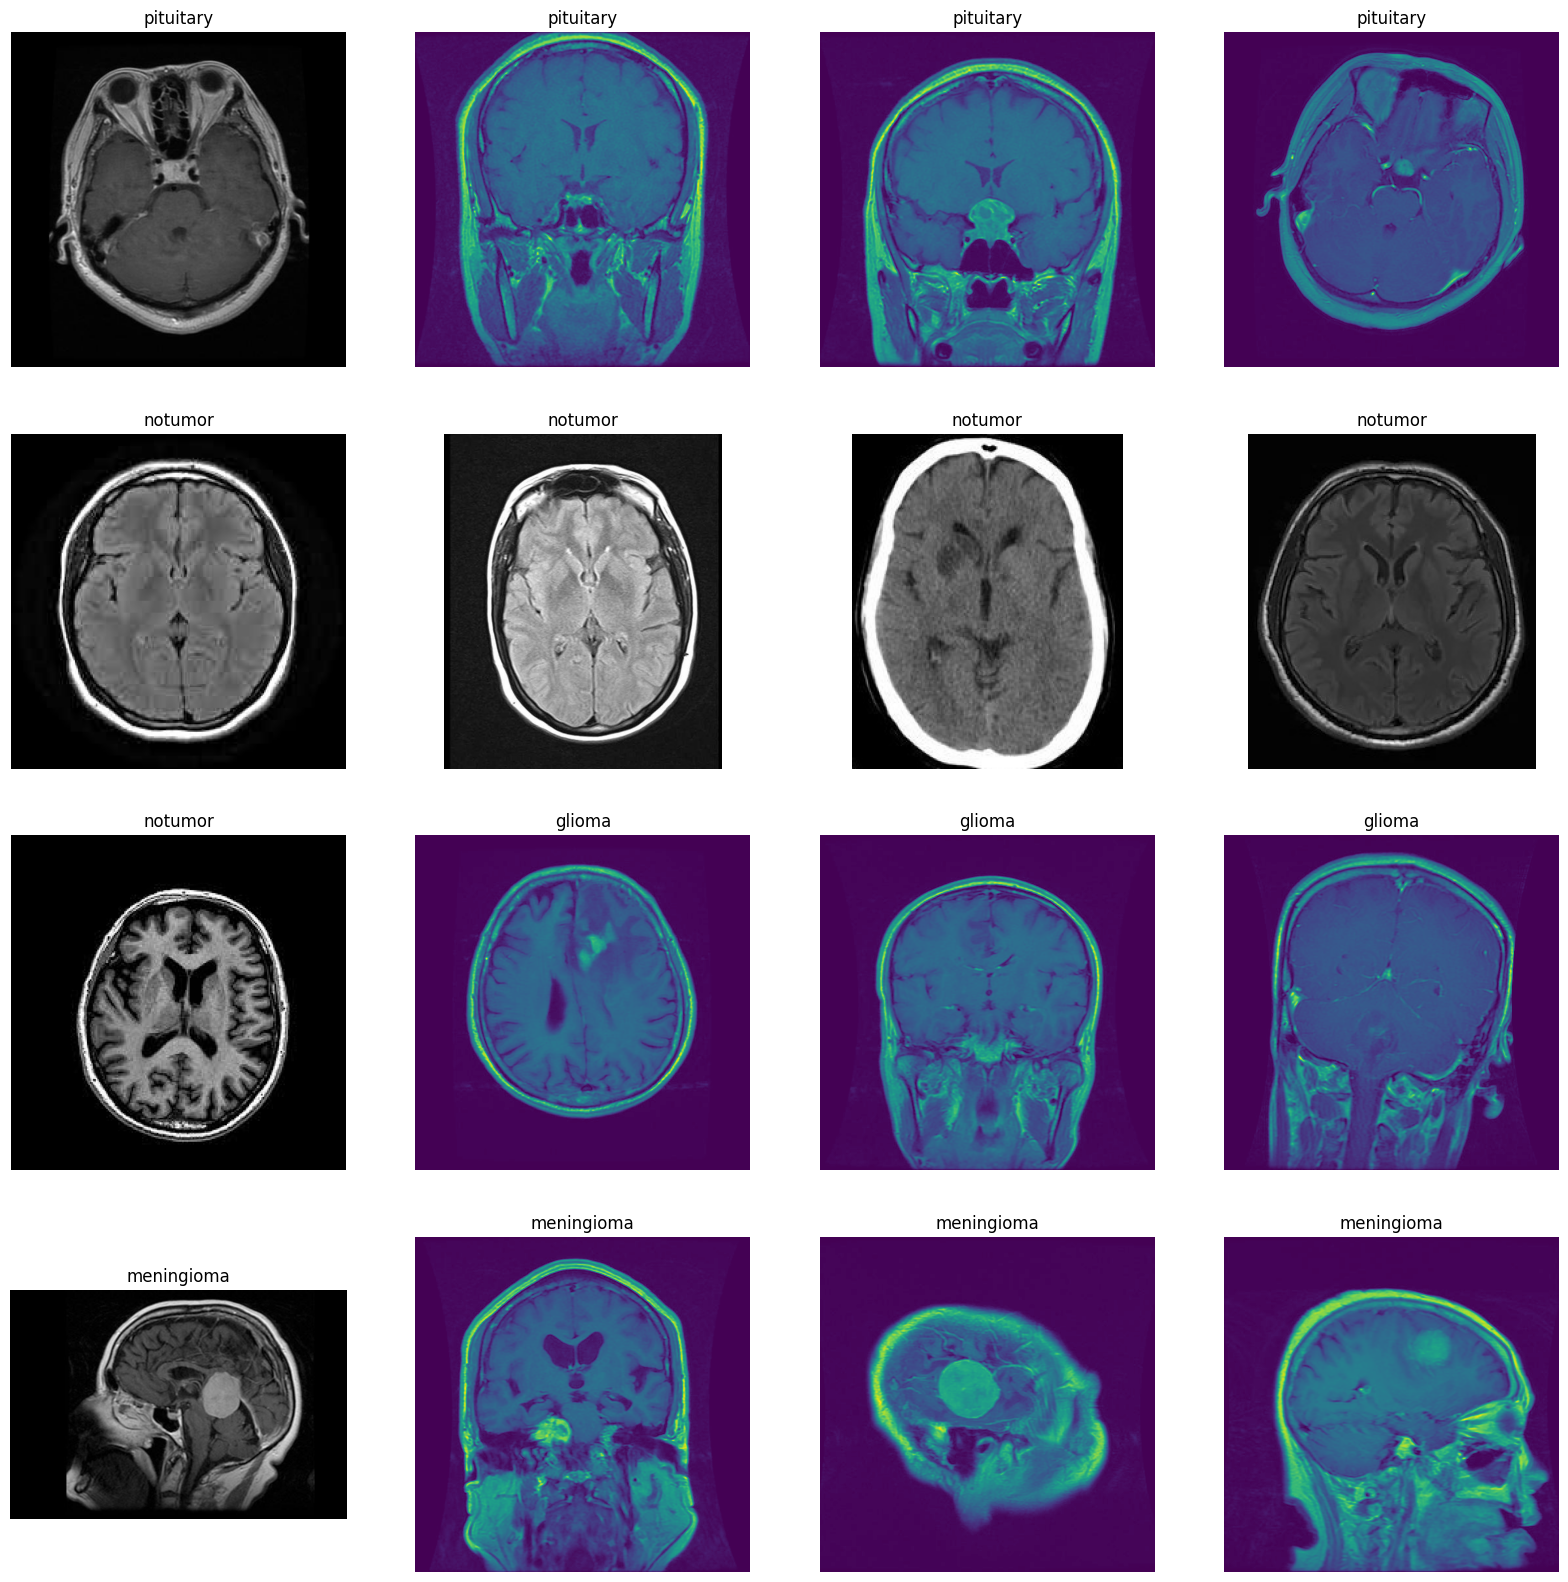

In [9]:
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    index = i*375
    img_path = train_df['filepath'].iloc[index]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(train_df['label'].iloc[index])
    plt.axis('off')
    
plt.show()